#                                Iris Flower Classification Model

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'Advertising.csv',
 'car data.csv',
 'Car_Price_Prediction.ipynb',
 'EMAIL_Spam _detection.ipynb',
 'Email_Spam_Detector.ipynb',
 'Iris.csv',
 'Iris_classification.html',
 'Iris_classification_files',
 'Iris_task1.ipynb',
 'mail_data.csv',
 'Sales_Prediction.ipynb',
 'spam.csv',
 'Unemployment in India.csv',
 'Unemployment _in _India_task2.ipynb',
 'Unemployment_Rate_upto_11_2020.csv',
 'Untitled.ipynb',
 'Untitled1.ipynb']

# Loading datasets

In [4]:
df=pd.read_csv('Iris.csv')

In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#deleting a column
df=df.drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
#displaying stats
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
#display info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
#displaying no of samples for each class
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Preprocessing the dataset

In [10]:
#check for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Exploratory data analysis:-

# Histograms

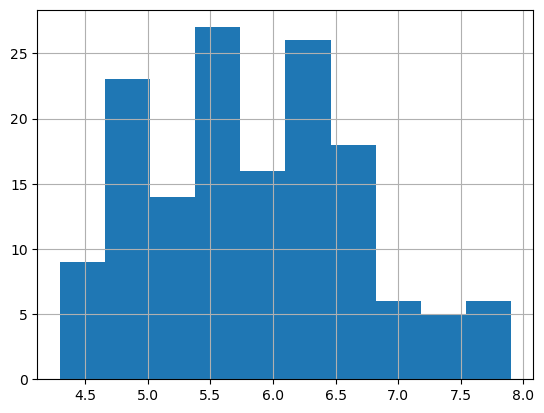

In [11]:
df['SepalLengthCm'].hist()
plt.show()

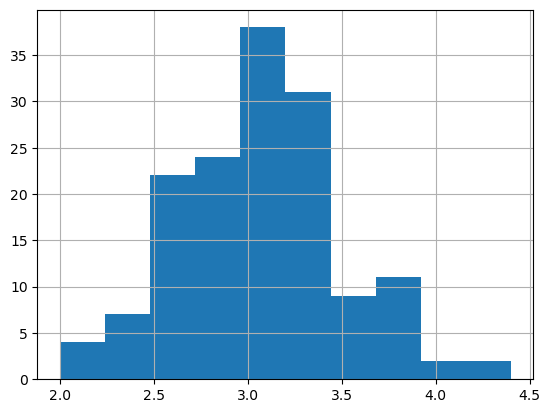

In [12]:
df['SepalWidthCm'].hist()
plt.show()

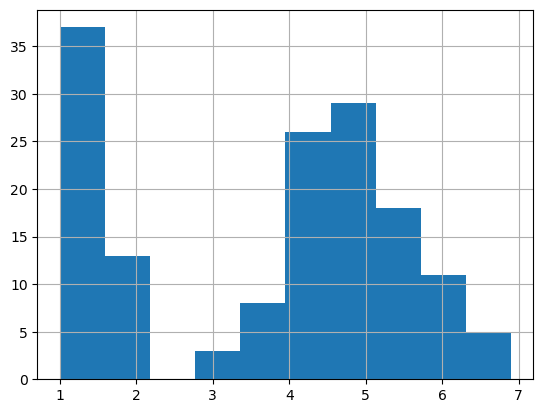

In [13]:
df['PetalLengthCm'].hist()
plt.show()

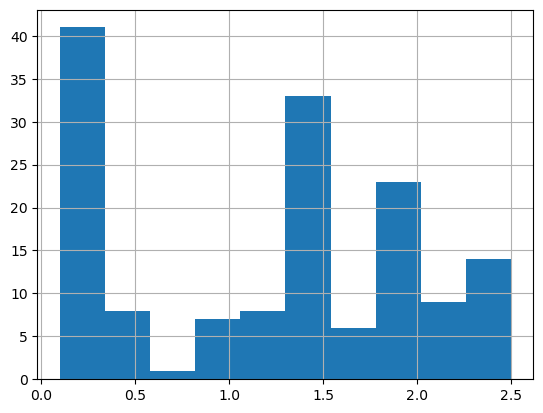

In [14]:
df['PetalWidthCm'].hist()
plt.show()

# Scatterplot

In [15]:
colors=['orange','red','green']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']

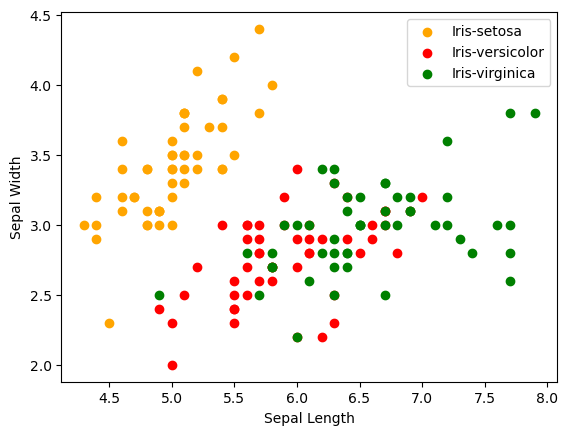

In [16]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=colors[i],label=species[i])
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.legend()

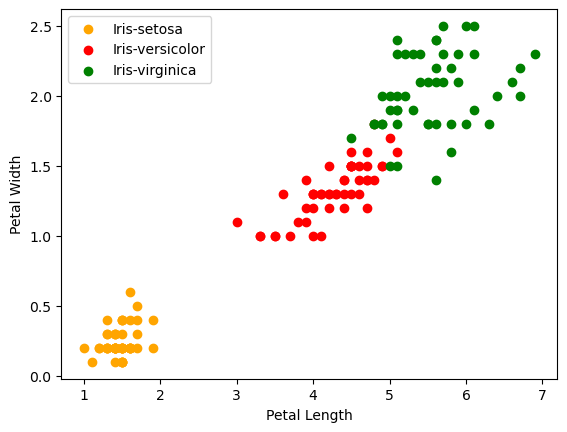

In [17]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    plt.legend()

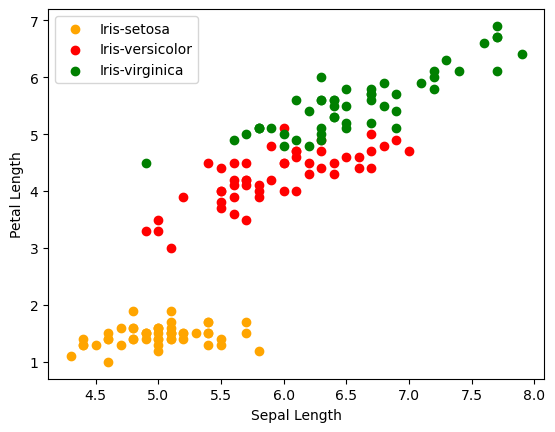

In [18]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],c=colors[i],label=species[i])
    plt.xlabel('Sepal Length')
    plt.ylabel('Petal Length')
    plt.legend()

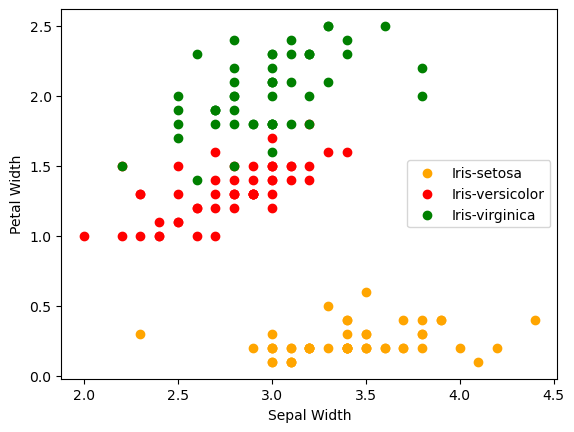

In [19]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
    plt.xlabel('Sepal Width')
    plt.ylabel('Petal Width')
    plt.legend()

In [20]:
#Corelation matrix
df.corr()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_11548\456010220.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


C:\Users\KIIT\AppData\Local\Temp\ipykernel_11548\3720340124.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


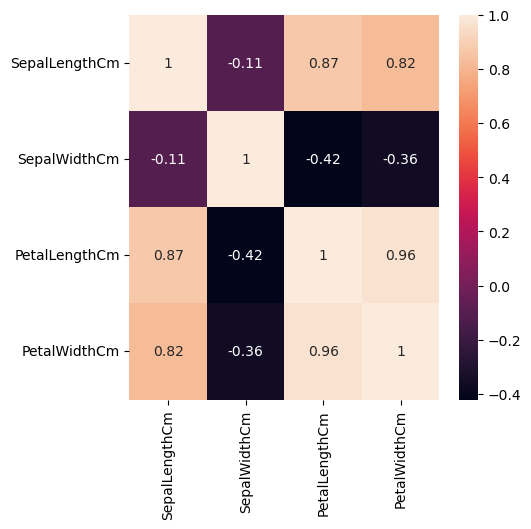

In [21]:
corr=df.corr()
fig,ax=plt.subplots(figsize=(5,5))
sns.heatmap(corr,annot=True,ax=ax)
plt.show()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_11548\262652163.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


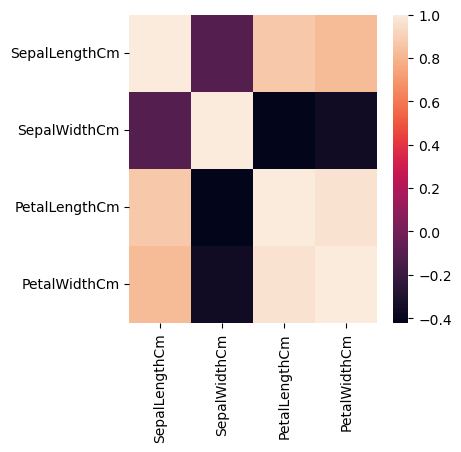

In [22]:
corr=df.corr()
fig,ax=plt.subplots(figsize=(4,4))
sns.heatmap(corr,annot=False,ax=ax)
plt.show()

In [23]:
#label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [24]:
df['species']=le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,species
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


# Model Training

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
#train-70
#test-30
X=df.drop(columns=['Species'])
Y=df['Species']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20)

In [26]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [27]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [28]:
pipe.score(x_test, y_test)

1.0

In [29]:
model.fit(x_train,y_train)

LogisticRegression()

In [30]:
#print metric to get performance
print("Accuracy:",model.score(x_test,y_test))

Accuracy: 1.0


In [31]:
# KNN: K-nearest neighbor
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [32]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [33]:
#print metric to get performance
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 100.0


In [34]:
#Decision-Tree
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [35]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [36]:
#print metric to get performance
print("Accuracy:",model.score(x_test,y_test))

Accuracy: 1.0
